In [ ]:
* tensor
TensorFlow에서 Tensor(텐서)란 딥러닝에서 데이터를 표현하는 방식
텐서플로의 텐서(Tensor)는 상태가 없고, 변경이 불가능한(immutable stateless) 객체
    -> 텐서플로는 상태를 변경할 수 있는 연산자가 내장되어 있으며, 이러한 연산자는 상태를 표현하기 위한 저수준 파이썬 표현보다 사용하기가 더 좋습니다.

텐서플로 변수는 값을 저장하는 객체로 텐서플로 연산에 사용될 때 저장된 이 값을 읽어올 것
    ->  tf.assign_sub, tf.scatter_update 등은 텐서플로 변수에 저장되있는 값을 조작하는 연산자




In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.enable_eager_execution()

In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# 값을 재배열합니다.
v.assign(3.0)
assert v.numpy() == 3.0

# tf.square()와 같은 텐서플로 연산에 `v`를 사용하고 재할당합니다. 
v.assign(tf.square(v))
assert v.numpy() == 9.0

In [ ]:
# 선형 모델 훈련

- 간단한 모델을 구축하고 학습시키기 위해 

1. 모델 정의
2. 손실함수 정의
3. 훈련 데이터 가져오기
4. 훈련 데이터에서 실행, 데이터에 최적화하기 위해 옵티마이져 사용한 변수 조정 

In [7]:
# 1. 모델 정의 

# f(x) = x * W + b, 모델은 W 와 b 두 변수를 가지고 있는 선형모델이며, 
    ## 잘 학습된 모델이 W = 3.0 and b = 2.0의 값을 갖도록 합성 데이터를 만들겠습니다.

class Model(object):
  def __init__(self):
    # 변수를 (5.0, 0.0)으로 초기화 합니다.
    # 실제로는 임의의 값으로 초기화 되어야합니다.
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b
  
model = Model()

assert model(3.0).numpy() == 15.0

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# 손실 함수 정의 
# 주어진 입력에 대한 모델의 출력이 원하는 출력과 얼마나 잘 일치하는지를 측정 


# 평균제곱오차를 적용한 손실함수 사용
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [9]:
# 훈련 데이터 가져오기 

In [10]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

# 약간의 잡음과 훈련데이터 합치기 

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

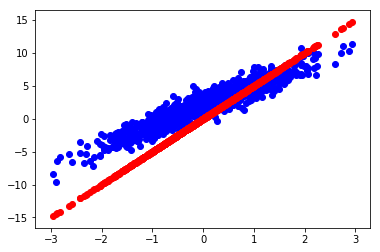

현재 손실: 
8.834545


In [11]:
import matplotlib.pyplot as plt

# 모델의 예측 : 빨간색 
    ## output 은 옳은 값이라고 설정한 w,b를 넣은 모델이 만들어낸 결과 = 실제로 나올거라고 예측되는 값 
    
# 훈련 데이터 : 파란색 
    ## model(inputs) 은 임의의 w,b라고 가정한 값을 넣은 모델의 결과값 = 훈련된 데이터 값
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('현재 손실: '),
print(loss(model(inputs), outputs).numpy())

In [ ]:
# 훈련 루프 정의 

- 위의 것들을 통해서 네트워크와 훈련데이터를 준비함 

- 변수를 업데이트 하기 위해 훈련 데이터를 사용해 훈련

- 훈련한 뒤 gradient descent를 사용하여 손실을 감소시킴 



In [12]:
# 경사하강법의 여러가지 방법들은 tf.train.Optimizer 에 구현되어 있음
# 여기서는 기본적인 방법 사용

def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

에포크  0: W=5.00 b=0.00, 손실=8.83455
에포크  1: W=4.61 b=0.40, 손실=6.05262
에포크  2: W=4.30 b=0.72, 손실=4.26371
에포크  3: W=4.05 b=0.97, 손실=3.11331
에포크  4: W=3.85 b=1.18, 손실=2.37349
에포크  5: W=3.69 b=1.34, 손실=1.89769
에포크  6: W=3.56 b=1.47, 손실=1.59167
에포크  7: W=3.46 b=1.58, 손실=1.39484
에포크  8: W=3.37 b=1.66, 손실=1.26823
에포크  9: W=3.30 b=1.73, 손실=1.18680


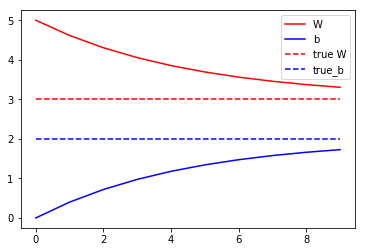

In [13]:
# 훈련을 반복적으로 실행하고 w,b의 변화과정을 확인 

model = Model()

# 도식화를 위해 W값과 b값의 변화를 저장합니다.
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('에포크 %2d: W=%1.2f b=%1.2f, 손실=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# 저장된 값들을 도식화합니다.
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()
  